<h1><b>Análise exploratória de dados</b></h1>

---



In [7]:
data = read.csv('ConsumoEnergiaMunicipioRio.csv')

<h2><b>Número de exemplares (linhas) e dimensões (colunas)</b></h2>

In [8]:
print(paste("Número de linhas: ", nrow(data)))
print(paste("Número de coluna: ", ncol(data)))

[1] "Número de linhas:  40"
[1] "Número de coluna:  6"


<h2><b>Tipos de dados</b></h2>

In [9]:
str(data)

'data.frame':	40 obs. of  6 variables:
 $ Ano                 : int  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 ...
 $ Total.MWh.          : num  8871979 8884447 9594291 10902884 11622014 ...
 $ MedioAnual.MWh.hab. : num  1.74 1.73 1.86 2.1 2.22 ...
 $ MedioMensal.KWh.hab.: num  145 144 155 175 185 ...
 $ MedioDiario.KWh.hab.: num  4.84 4.82 5.17 5.83 6.17 ...
 $ Populacao.hab.      : int  5090790 5125066 5159573 5194312 5229285 5264493 5299939 5335623 5371547 5407713 ...


<h2><b>Medidas de posição e dispersão</b></h2>




<h3><b>Total.MWh.</b></h3>

Medida de posição:

In [10]:
print(paste("Média: ", mean(data$Total.MWh)))
print(paste("Mediana: ", median(data$Total.MWh)))
print("Separatrizes:")
print(quantile(data$Total.MWh))

[1] "Média:  14461747.20405"
[1] "Mediana:  14442423.185"
[1] "Separatrizes:"
      0%      25%      50%      75%     100% 
 8871979 13105396 14442423 16630536 18096224 


Medida de dispersão:

In [11]:
print(paste("Variância: ", var(data$Total.MWh)))
print(paste("Desvio padrão: ", sd(data$Total.MWh)))
print(paste("Amplitude: ", max(data$Total.MWh)-min(data$Total.MWh)))


[1] "Variância:  6085238278875.45"
[1] "Desvio padrão:  2466827.57380313"
[1] "Amplitude:  9224244.834"


<h3><b>Populacao.hab.</b></h3>

Medida de posição:

In [12]:
print(paste("Média: ", mean(data$Populacao.hab.)))
print(paste("Mediana: ", median(data$Populacao.hab.)))
print("Separatrizes:")
print(quantile(data$Populacao.hab.))

[1] "Média:  5850557.3"
[1] "Mediana:  5836327.5"
[1] "Separatrizes:"
     0%     25%     50%     75%    100% 
5090790 5435020 5836328 6220144 6718903 


Medida de dispersão:

In [13]:
print(paste("Variância: ", var(data$Populacao.hab.)))
print(paste("Desvio padrão: ", sd(data$Populacao.hab.)))
print(paste("Amplitude: ", max(data$Populacao.hab.)-min(data$Populacao.hab.)))

[1] "Variância:  232311993361.087"
[1] "Desvio padrão:  481987.544819456"
[1] "Amplitude:  1628113"


<h2><b>Distribuição e frequência</b></h2>


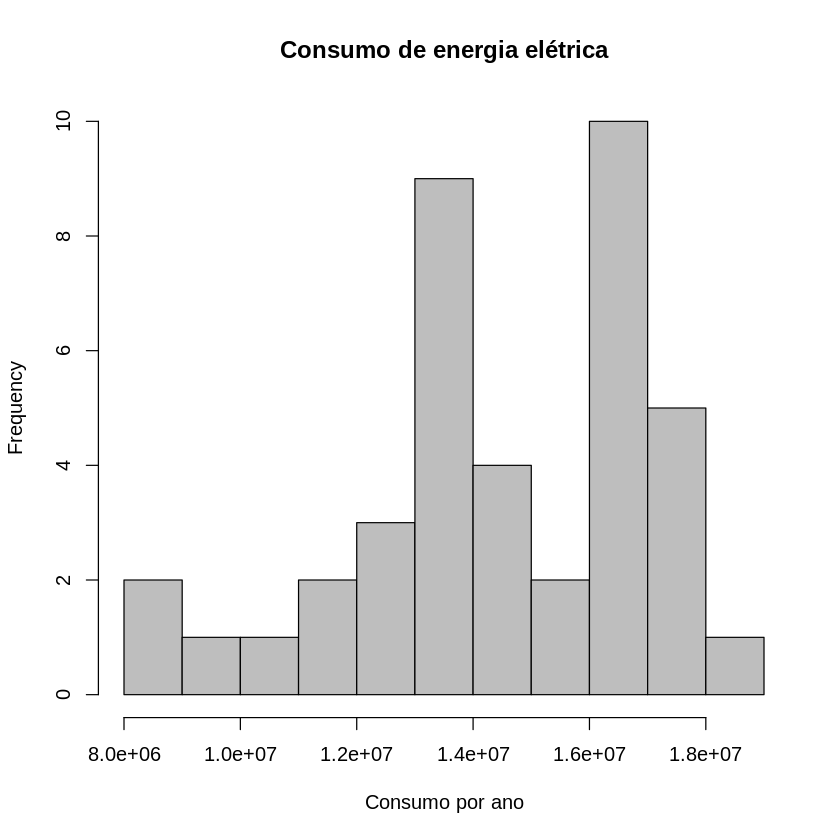

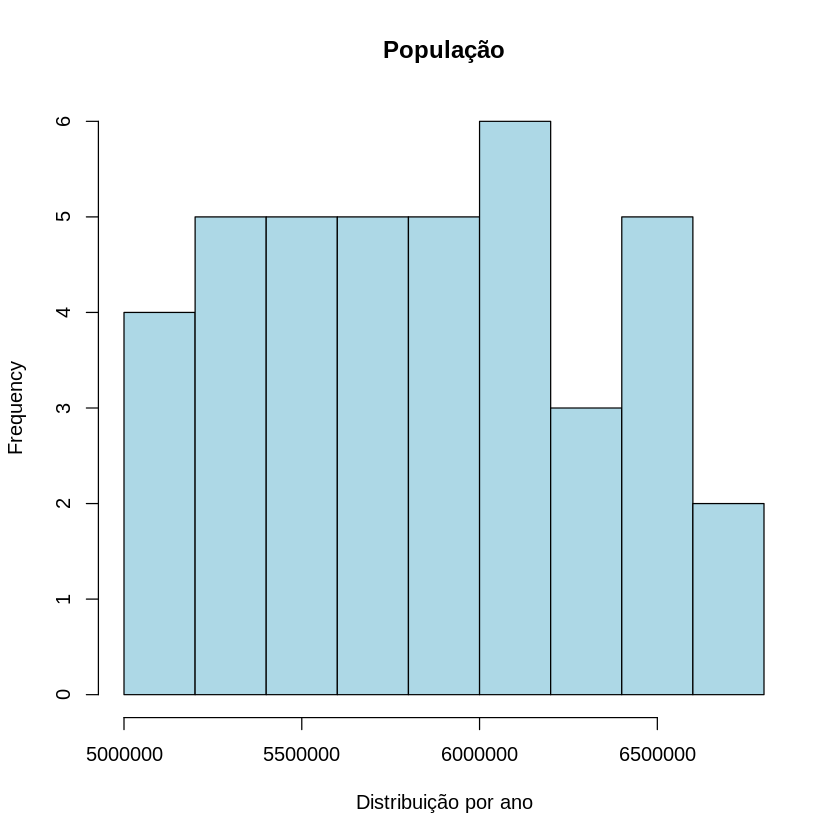

In [14]:
hist(data$Total.MWh, main = "Consumo de energia elétrica", xlab = "Consumo por ano", col = "gray")
hist(data$Populacao.hab., main = "População", xlab = "Distribuição por ano", col = "lightblue")

<h2><b>Correlações</b></h2>
O valor da correlação indica que as variáveis possuem forte correlação em sentidos iguais.

In [15]:
print(cor(data$Total.MWh, data$Populacao.hab.))

[1] 0.9002891


<h2><b>Valores perdidos ou incorretos</b></h2>

In [16]:
sapply(data, function(x) sum(is.na(x)))

Ano           Total.MWh.  MedioAnual.MWh.hab. 
                   0                    0                    0 
MedioMensal.KWh.hab. MedioDiario.KWh.hab.       Populacao.hab. 
                   0                    0                    0

<h2><b>Anomalias e outliers</b></h2>

<h3><b>Total.MWh.</b></h3>

[1] "Outliers:  "


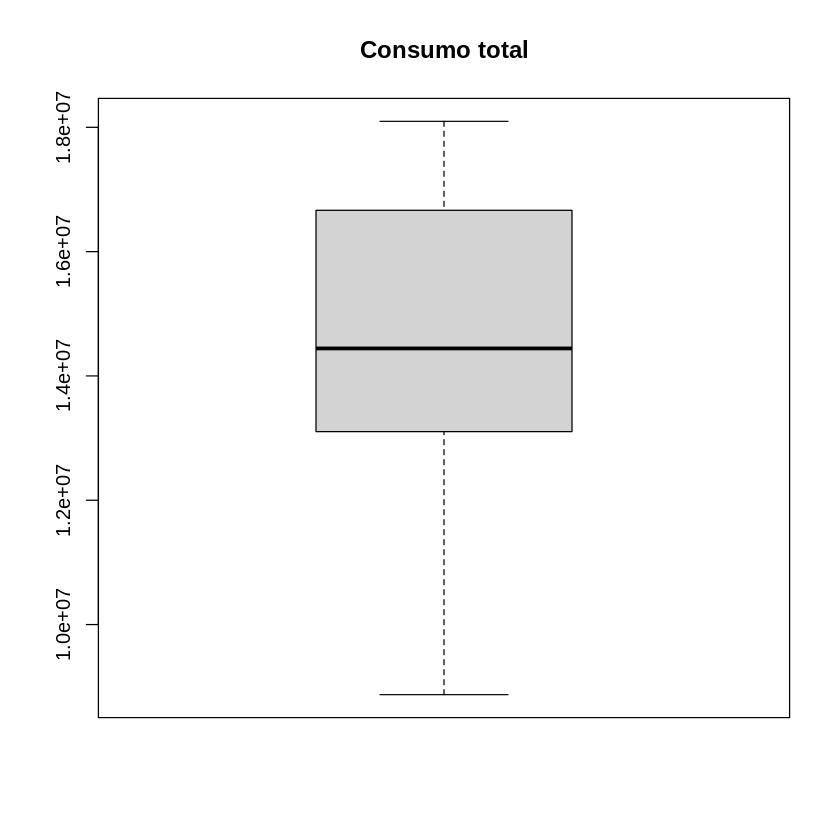

In [17]:
iqr = IQR(data$Total.MWh)
Q1 = quantile(data$Total.MWh,probs = c(.25))
Q3 = quantile(data$Total.MWh,probs = c(.75))
print(paste("Outliers: ", data[data$Total.MWh > Q3+1.5*iqr | data$Total.MWh < Q1-1.5*iqr, c("Total.MWh.")]))
boxplot(data$Total.MWh, main = "Consumo total")

<h3><b>Populacao.hab.</b></h3>

[1] "Outliers:  "


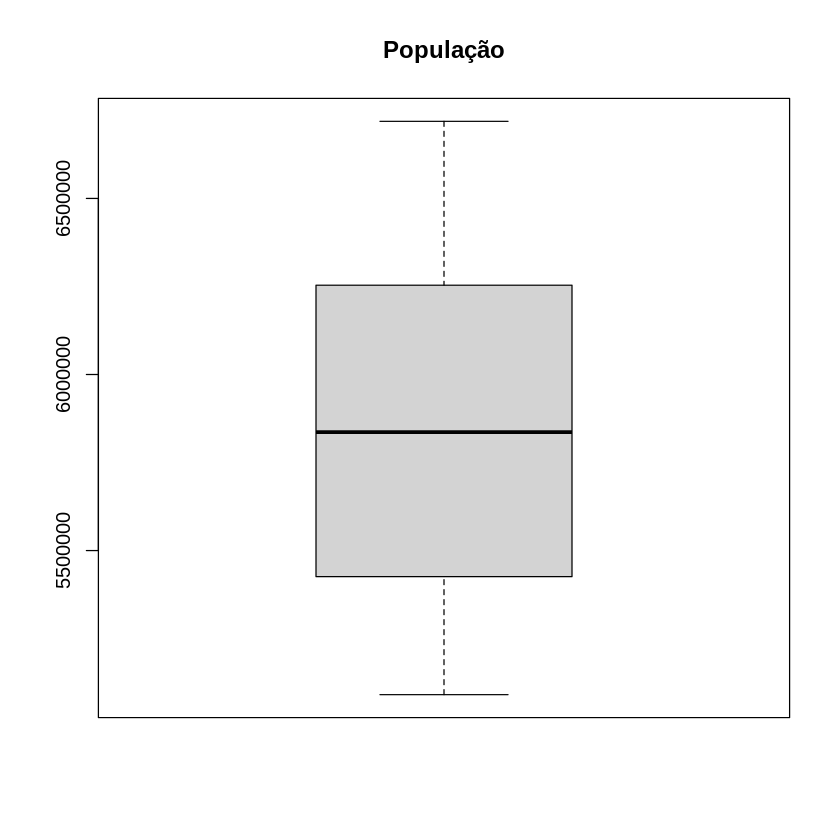

In [18]:
iqr = IQR(data$Populacao.hab.)
Q1 = quantile(data$Populacao.hab.,probs = c(.25))
Q3 = quantile(data$Populacao.hab.,probs = c(.75))
print(paste("Outliers: ", data[data$Populacao.hab. > Q3+1.5*iqr | data$Populacao.hab. < Q1-1.5*iqr, c("Populacao.hab.")]))
boxplot(data$Populacao.hab., main = "População")

In [19]:
#Anos em que houveram menor e maior consumo de energia
data[data$Total.MWh. == min(data$Total.MWh.)|data$Total.MWh. == max(data$Total.MWh.),c(1,2)]

,Ano,Total.MWh.
,<int>,<dbl>
1,1980,8871979
35,2014,18096224


In [20]:
#Consumo anual de Megawatt por habitante
MWh.Hab = c(0)
MWh.Hab = data$Total.MWh./data$Populacao.hab.
df = data.frame(data$Ano, data$Populacao.hab.,data$Total.MWh.,MWh.Hab)
colnames(df)[3] = "Total.MWh"
colnames(df)[1] = "Ano"
colnames(df)[2] = "Populacao"
head(df)

,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
1,1980,5090790,8871979,1.742751
2,1981,5125066,8884447,1.733528
3,1982,5159573,9594291,1.859513
4,1983,5194312,10902884,2.099004
5,1984,5229285,11622014,2.222486
6,1985,5264493,11765155,2.234813


In [21]:
#Anos em que houveram menor e maior consumo de energia por habitante
df[df$Total.MWh == min(df$Total.MWh)|df$Total.MWh == max(df$Total.MWh),c(1,3)]

,Ano,Total.MWh
,<int>,<dbl>
1,1980,8871979
35,2014,18096224


In [22]:
#variabilidade do consumo de energia por habitante anual
summary(df$MWh.Hab)
sd(df$MWh.Hab)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.734   2.346   2.480   2.457   2.675   2.829 

[1] 0.268594

In [23]:
#Todos os valores estão dentro do intervalo de 3 desvios padrões.
k = mean(df$MWh.Hab)+3*sd(df$MWh.Hab)
p = mean(df$MWh.Hab)-3*sd(df$MWh.Hab)
print(nrow(df[df$MWh.Hab < k & df$MWh.Hab > p,])/nrow(df))

[1] 1


In [24]:
#Outliers MWh/Hab no ano
iqr = IQR(df$MWh.Hab)
Q1 = quantile(df$MWh.Hab,probs = c(.25))
Q3 = quantile(df$MWh.Hab,probs = c(.75))
df[df$MWh.Hab > Q3+1.5*iqr | df$MWh.Hab < Q1-1.5*iqr,]

,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
1,1980,5090790,8871979,1.742751
2,1981,5125066,8884447,1.733528


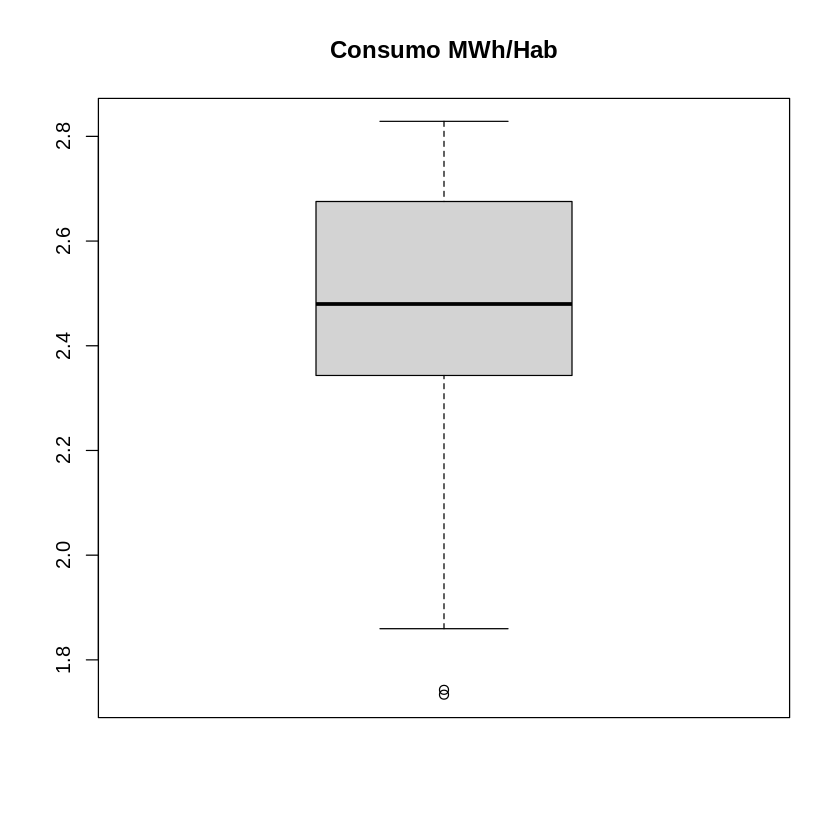

In [25]:
boxplot(df$MWh.Hab, main = 'Consumo MWh/Hab')

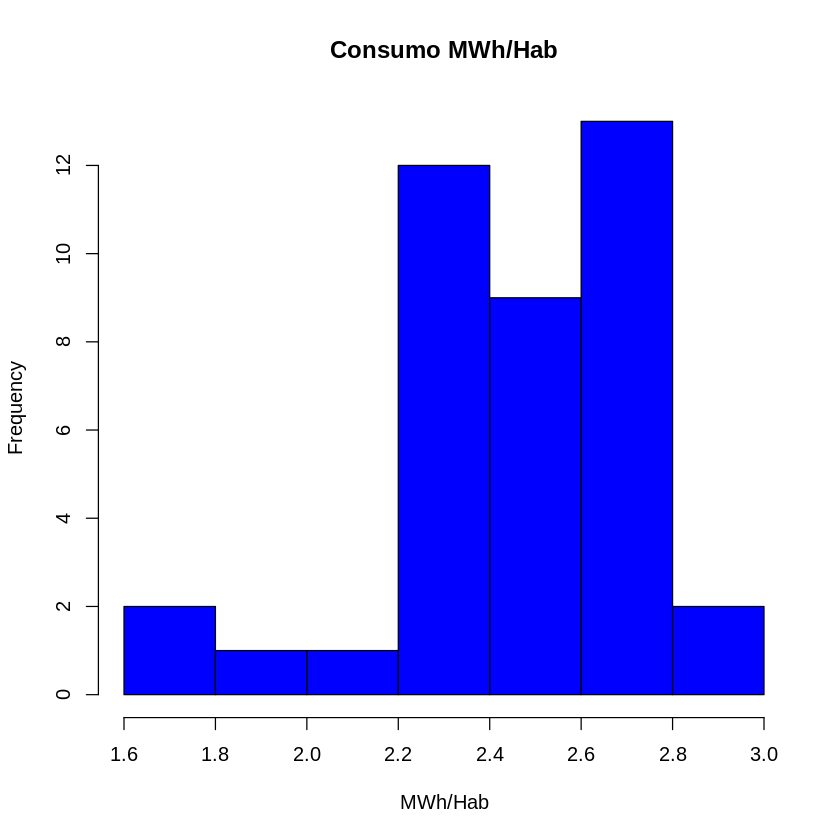

In [26]:
#Consumo anual de MWh/Hab
hist(df$MWh.Hab, main = 'Consumo MWh/Hab', col = 'blue',xlab = 'MWh/Hab')

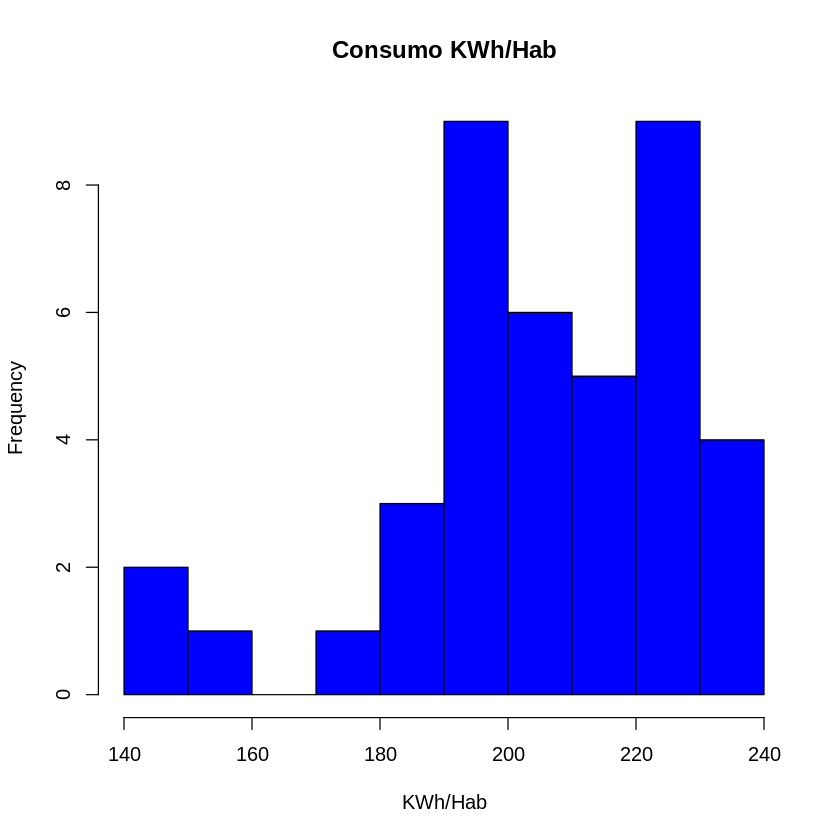

In [27]:
#Consumo mensal de KWh/Hab
hist(1000*df$MWh.Hab/12, main = 'Consumo KWh/Hab', col = 'blue',xlab = 'KWh/Hab')

In [28]:
#Anos com consumo de energia (kWh/Hab) entre [150;180].
df[1000*df$MWh.Hab/12>=150 & 1000*df$MWh.Hab/12 <= 180,]

,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
3,1982,5159573,9594291,1.859513
4,1983,5194312,10902884,2.099004


In [29]:
df[1000*df$MWh.Hab/12>=190 & 1000*df$MWh.Hab/12 <=200,]

,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
7,1986,5299939,12446331,2.348391
8,1987,5335623,12475527,2.338158
9,1988,5371547,12652650,2.355495
13,1992,5521452,13124963,2.377085
14,1993,5562429,13106850,2.356318
15,1994,5603709,13386636,2.388889
23,2002,5937253,13739063,2.314044
24,2003,5974081,13868520,2.321448
26,2005,6094183,14341920,2.353379


In [30]:
df[1000*df$MWh.Hab/12>=220 & 1000*df$MWh.Hab/12 <=230,]
df[1000*df$MWh.Hab/12 == max(1000*df$MWh.Hab/12),]
hf = df[df$Ano>2000 & df$Ano<2010,]
hf[1000*df$MWh.Hab/12 == min(1000*df$MWh.Hab/12),]

,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
18,1997,5729397,15319686,2.673874
28,2007,6132342,16520491,2.693994
29,2008,6161047,16596539,2.693786
31,2010,6320446,16935391,2.679461
32,2011,6355949,16901704,2.659194
33,2012,6390290,17108243,2.677225
34,2013,6429923,17476913,2.718060
36,2015,6476631,17661298,2.726927
37,2016,6498837,17341175,2.668350


,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
21,2000,5857904,16570296,2.828707


,Ano,Populacao,Total.MWh,MWh.Hab
,<int>,<int>,<dbl>,<dbl>
23,2002,5937253,13739063,2.314044


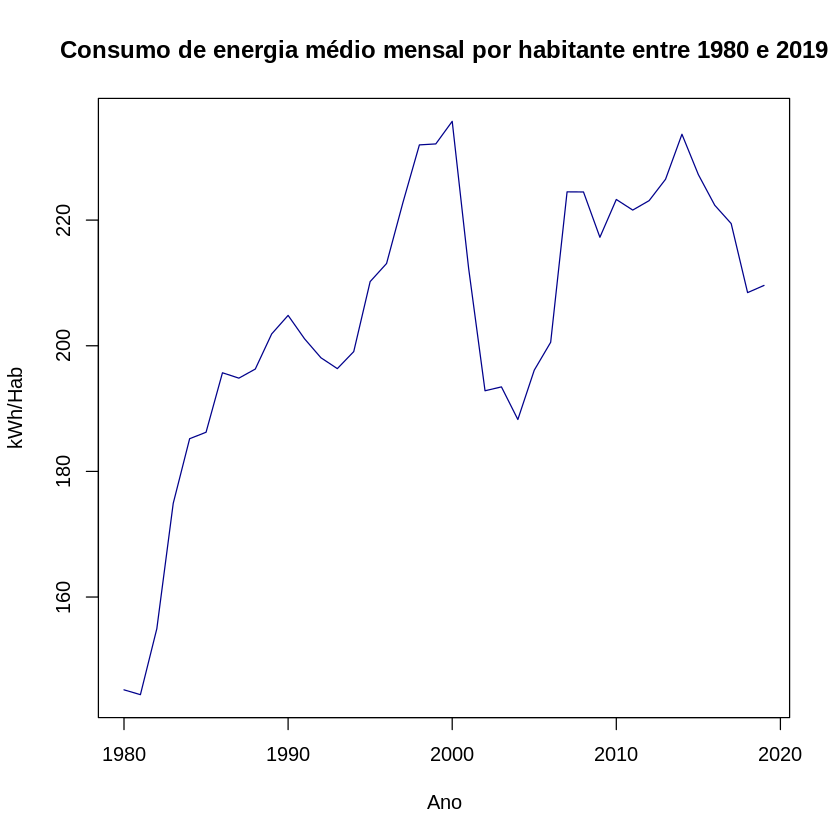

In [31]:
#gráfico de linha entre a população e consumo médio mensal kWh/hab entre 1980 à 2019.
plot(df$Ano, 1000*df$MWh.Hab/12, main = 'Consumo de energia médio mensal por habitante entre 1980 e 2019', 
xlab = 'Ano', ylab = 'kWh/Hab', col = 'darkblue', type = 'l')

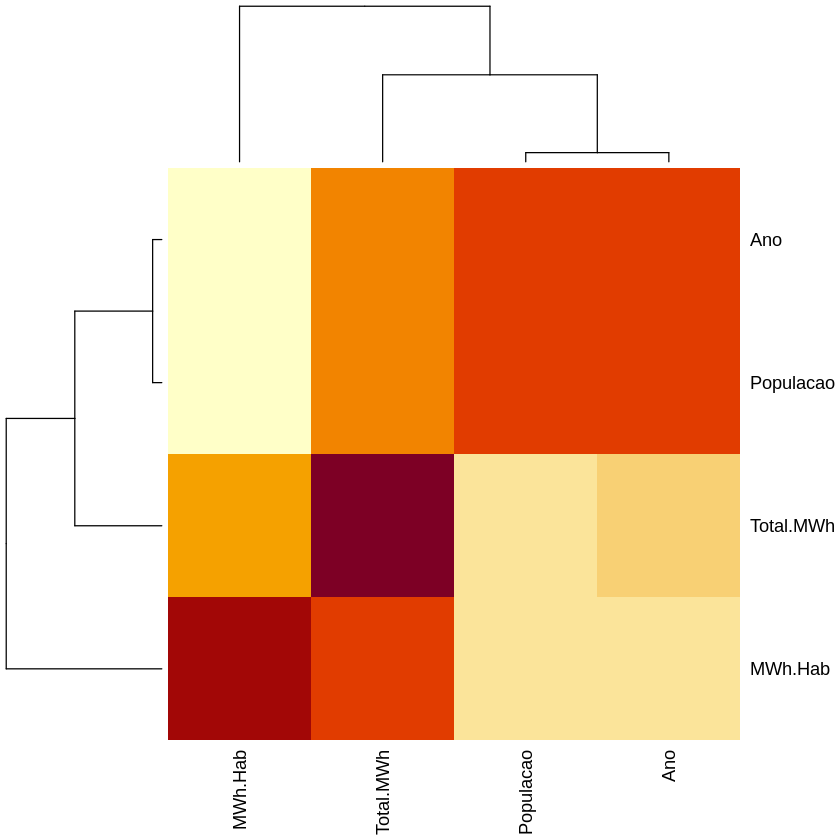

In [32]:
#O mapa de calor indica correlação entre os seguintes atributos: (Ano, População),
#(Total MWh, População), (MWh/Hab, Total MWh), (Total MWh, Ano).  
f = signif(cor(df),2)
heatmap(f, cexRow= 1.1, cexCol = 1.1)

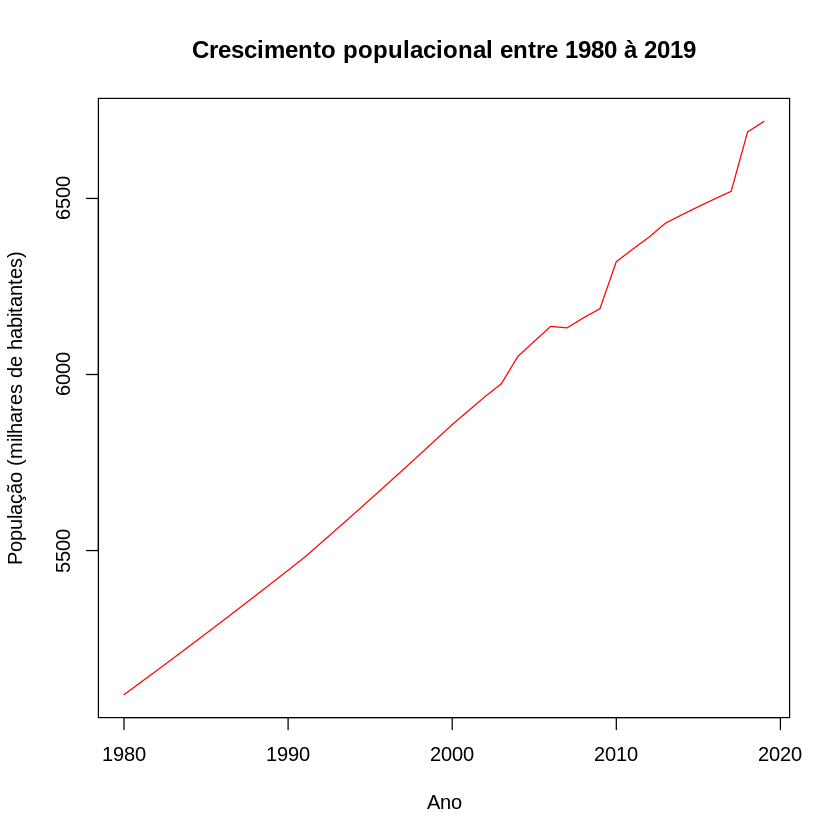

In [33]:
#Crescimento populacional nos anos de 1980 à 2019
plot(df$Ano, df$Populacao/1000, main = 'Crescimento populacional entre 1980 à 2019',
xlab = 'Ano', ylab = 'População (milhares de habitantes)', 
type = 'l', col = 'red')

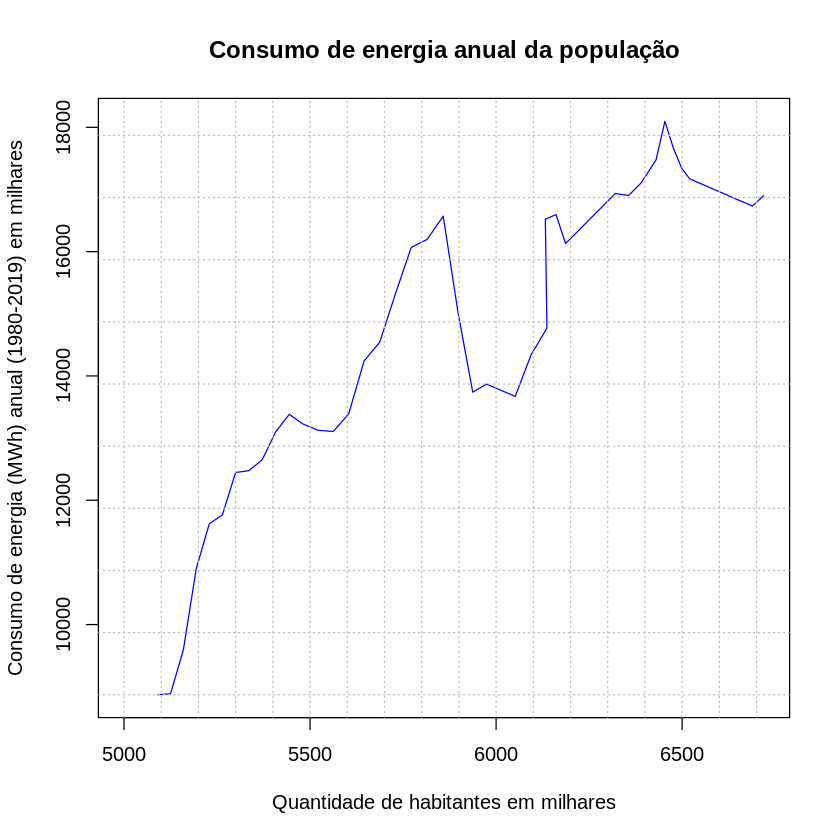

In [34]:
#Consumo de energia total anual em MWh e crescimento populacional
plot(df$Populacao/1000, df$Total.MWh/1000, main = 'Consumo de energia anual da população', 
xlab = 'Quantidade de habitantes em milhares', ylab = 'Consumo de energia (MWh) anual (1980-2019) em milhares', type = 'l', 
col = 'blue', xlim = c(5000, 6720)) 
abline(h=seq(8870,18100,1000),v=seq(5000,7000,100),lty=3,col="gray")

In [53]:
Y = df$Total.MWh/1000
X = df$Populacao/1000
dados <- data.frame(Y,X) 
modelo.regressao <- lm(Y ~ X, data= dados)
dados

Y,X
<dbl>,<dbl>
8871.979,5090.790
8884.447,5125.066
9594.291,5159.573
10902.884,5194.312
11622.014,5229.285
11765.155,5264.493
12446.331,5299.939
12475.527,5335.623
12652.650,5371.547


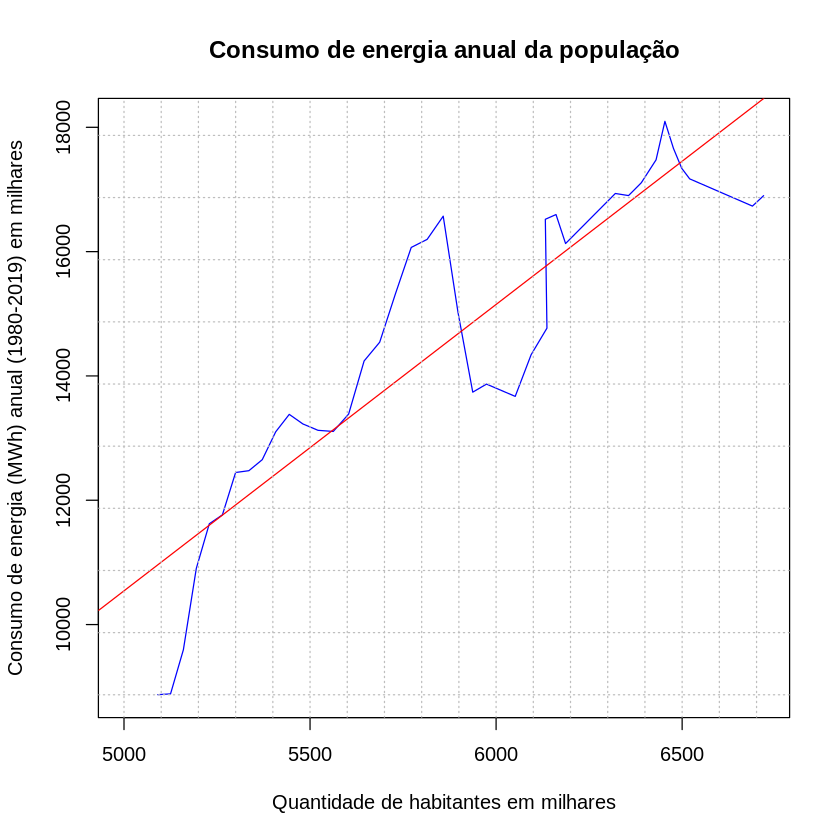

In [54]:
plot(X, Y, main = 'Consumo de energia anual da população', 
xlab = 'Quantidade de habitantes em milhares', ylab = 'Consumo de energia (MWh) anual (1980-2019) em milhares', type = 'l', 
col = 'blue', xlim = c(5000, 6720)) 
abline(modelo.regressao,col="red")
abline(h=seq(8870,18100,1000),v=seq(5000,7000,100),lty=3,col="gray")

In [55]:
coef(modelo.regressao)

(Intercept)             X 
-12495.915173      4.607708